*Data Exploration*

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filepath = "../data/cr_loan_raw.csv"
df = pd.read_csv(filepath)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
print(f'{df.shape[0]} rows, {df.shape[1]} columns')
print("-" * 40)
print(df.dtypes)

32581 rows, 12 columns
----------------------------------------
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [6]:
subset = df.select_dtypes(include='int64')
print(subset.nunique())

person_age                      58
person_income                 4295
loan_amnt                      753
loan_status                      2
cb_person_cred_hist_length      29
dtype: int64


In [7]:
categoricals = np.append(df.select_dtypes(include="object").columns.array, "loan_status")
numericals = np.setdiff1d(df.columns.array, categoricals)

In [12]:
for categorical in categoricals:
    print(f"{categorical} - {df[categorical].unique()}")

person_home_ownership - ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent - ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade - ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file - ['Y' 'N']
loan_status - [1 0]


Doesn't contain misspelled value or custom missing value in the categoric columns

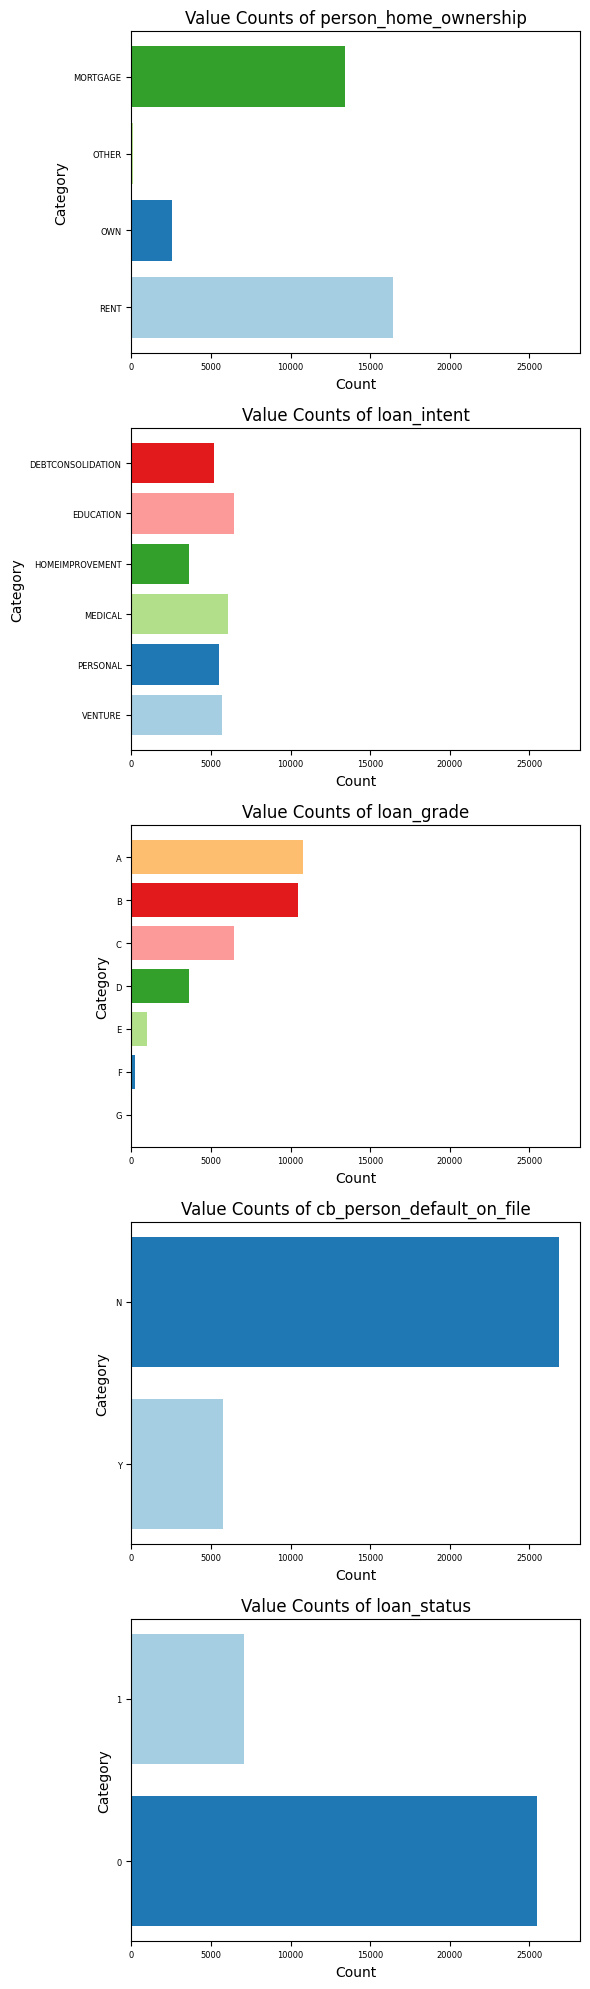

In [189]:
fig, axs = plt.subplots(len(categoricals), 1, figsize=(6,len(categoricals)*4),sharex=True)

for index, categorical in enumerate(categoricals):
    value_count_dict = df[categorical].value_counts().sort_index(ascending=False).to_dict()
    
    categories = list(value_count_dict.keys())
    counts = list(value_count_dict.values())

    axs[index].barh(categories, counts,color=plt.cm.Paired(range(len(categories))))
    axs[index].set_title(f'Value Counts of {categorical}')
    axs[index].set_xlabel('Count', fontsize=10)  
    axs[index].set_ylabel('Category', fontsize=10)  
    axs[index].set_yticks(categories)
    axs[index].tick_params(axis='both', labelsize=6, labelbottom=True)

plt.tight_layout() 
plt.show()

In [14]:
stats = df[numericals].describe()

,cb_person_cred_hist_length,loan_amnt,loan_int_rate,loan_percent_income,person_age,person_emp_length,person_income
count,32581.000000,32581.000000,29465.000000,32581.000000,32581.000000,31686.000000,3.258100e+04
mean,5.804211,9589.371106,11.011695,0.170203,27.734600,4.789686,6.607485e+04
std,4.055001,6322.086646,3.240459,0.106782,6.348078,4.142630,6.198312e+04
min,2.000000,500.000000,5.420000,0.000000,20.000000,0.000000,4.000000e+03
25%,3.000000,5000.000000,7.900000,0.090000,23.000000,2.000000,3.850000e+04
50%,4.000000,8000.000000,10.990000,0.150000,26.000000,4.000000,5.500000e+04
75%,8.000000,12200.000000,13.470000,0.230000,30.000000,7.000000,7.920000e+04
max,30.000000,35000.000000,23.220000,0.830000,144.000000,123.000000,6.000000e+06


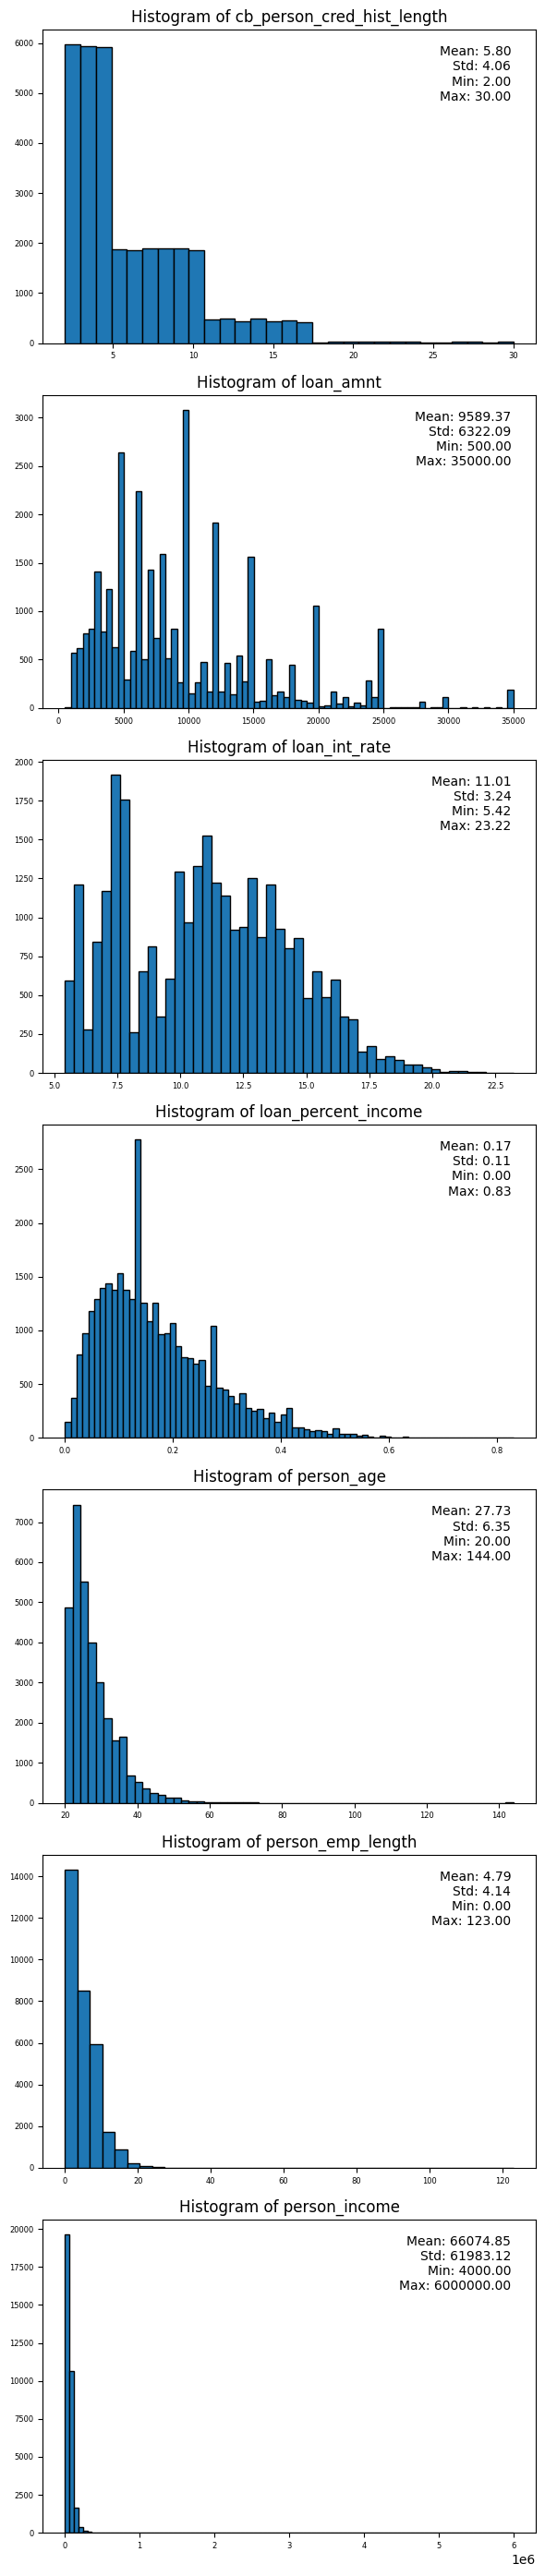

In [35]:
fig, axs = plt.subplots(len(numericals), 1, figsize=(6,len(numericals)*4))

for index, numerical in enumerate(numericals):
    data = df[numerical].dropna()
    n = len(data)
    
    if len(np.unique(data)) < 100:
        bins = len(np.unique(data))
    else:
        iqr = np.percentile(data, 75) - np.percentile(data, 25)
        bin_width = 2 * iqr * n ** (-1 / 3)
        bins = min(int((data.max() - data.min()) / bin_width), 100)

    axs[index].hist(data, bins=bins, edgecolor='black')

    textstr = f'Mean: {data.mean():.2f}\nStd: {data.std():.2f}\nMin: {data.min():.2f}\nMax: {data.max():.2f}'
    axs[index].text(0.95, 0.95, textstr, transform=axs[index].transAxes, fontsize=10,
                    verticalalignment='top', horizontalalignment='right')
    
    axs[index].set_title(f'Histogram of {numerical}')
    axs[index].tick_params(axis='both', labelsize=6, labelbottom=True)  


    
plt.tight_layout() 
plt.show()

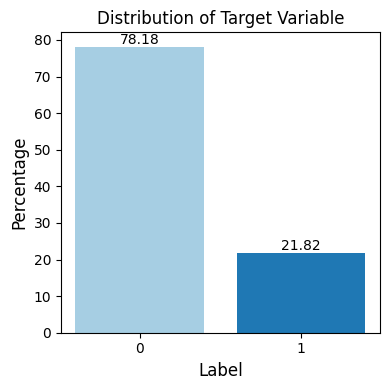

In [229]:
fig,ax = plt.subplots(figsize=(4,4))

target_var_counts = df["loan_status"].value_counts()
target_perc = (target_var_counts / target_var_counts.sum()) * 100

labels = target_perc.index
label_perc = target_perc.array

bars = ax.bar(labels, label_perc,color=plt.cm.Paired(range(len(labels))))
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", 
            ha='center', va='bottom', fontsize=10, color='black')

ax.set_title('Distribution of Target Variable')
ax.set_xlabel('Label',fontsize=12)
ax.set_ylabel('Percentage',fontsize=12)
ax.set_xticks(labels)

plt.tight_layout() 
plt.show()